# Correlações Entre Variáveis

### Correlações Quanti vs Quanti

In [1]:
import pandas as pd 
import numpy as np 

In [7]:
df = pd.read_csv('Datasets/base_ifood_limpa.csv', sep=';', header=0).drop(columns=['Unnamed: 0'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391674 entries, 0 to 391673
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  391674 non-null  bool   
 1   category                391674 non-null  object 
 2   delivery_fee            391674 non-null  float64
 3   delivery_time           391674 non-null  int64  
 4   distance                391674 non-null  float64
 5   minimumOrderValue       391674 non-null  float64
 6   price_range             391674 non-null  object 
 7   rating                  391674 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 21.3+ MB


In [8]:
df

,availableForScheduling,category,delivery_fee,delivery_time,distance,minimumOrderValue,price_range,rating
0,False,Marmita,3.99,27,1.22,10.0,CHEAPEST,0.00000
1,False,Açaí,7.99,61,4.96,10.0,CHEAPEST,0.00000
2,False,Bebidas,11.99,70,8.35,5.0,MODERATE,0.00000
3,False,Carnes,16.49,63,6.35,20.0,CHEAPEST,0.00000
4,False,Brasileira,11.99,58,5.22,20.0,CHEAPEST,0.00000
...,...,...,...,...,...,...,...,...
391669,False,Açaí,9.00,60,3.53,30.0,CHEAPEST,4.95000
391670,False,Açaí,6.00,50,2.60,10.0,CHEAPEST,0.00000
391671,False,Açaí,0.00,40,3.61,0.0,CHEAPEST,4.46602
391672,False,Lanches,8.00,60,3.54,20.0,CHEAPEST,5.00000


In [ ]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
df[numericas].corr()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
delivery_fee,1.000000,0.208230,0.724071,0.059945,0.030999
delivery_time,0.208230,1.000000,0.423321,0.025275,-0.138348
distance,0.724071,0.423321,1.000000,0.084524,-0.022032
minimumOrderValue,0.059945,0.025275,0.084524,1.000000,0.047161
rating,0.030999,-0.138348,-0.022032,0.047161,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

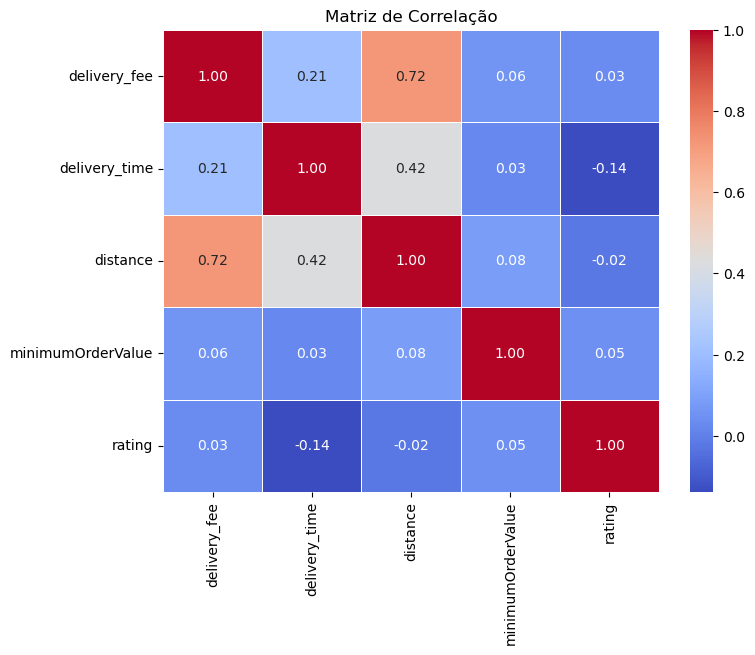

In [15]:
# Configura o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o mapa de calor
sns.heatmap(df[numericas].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Adicionar título
plt.title('Matriz de Correlação')
plt.show()

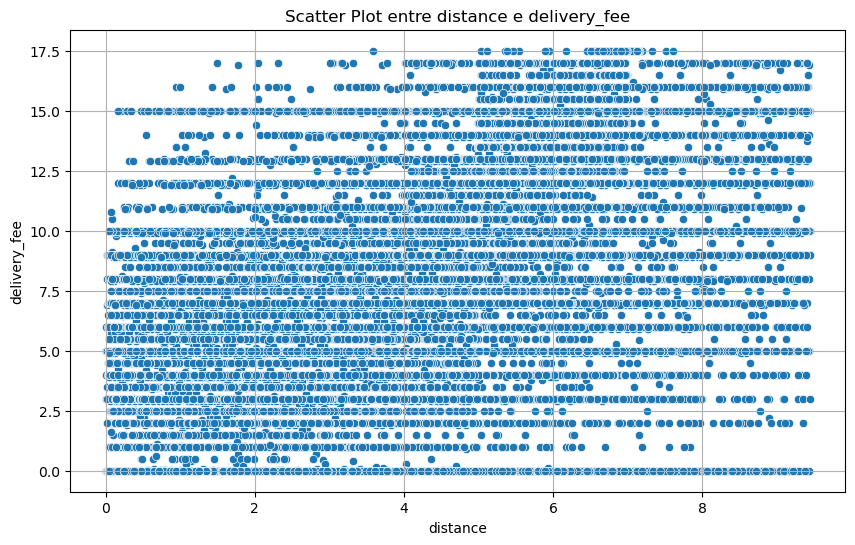

In [16]:
# 2 - Plotar scatterplots

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='delivery_fee')
plt.title('Scatter Plot entre distance e delivery_fee')
plt.xlabel("distance")
plt.ylabel("delivery_fee")
plt.grid()
plt.show()